# Homework 4
#### Assigned: 2019-04-05
#### Due EOD: 2019-04-14

Based on Lecture 9
+ The student fills in the <...> fields.  
+ The student can create as many new cells as necessary in the solution sections.

*Useful LaTeX macros that save typing (click into cell to see them)*
$\def\expect{\mathbb{E}}$
$\def\cov{\mathrm{cov}}$
$\def\var{\mathrm{var}}$

#### Name: < Guoqin Huang >
#### NetID: < gh1295 >

## Problem 1 (30 points)

We have an AR(1) model of the form
$$ 
x_t = \phi_0 + \phi_1 x_{t-1} + \epsilon_t  \qquad (1)
$$ 
At all times $t$ and $s$, the white noise $\epsilon_t$ has the properties
$$
\expect (\epsilon_t) = 0,  \qquad \cov(\epsilon_t, \epsilon_s) = \sigma^2 \delta_{t,s}  \qquad (2)
$$

Show the following:  

1. Mean $$\expect(x_t) = \frac{\phi_0}{1-\phi_1}$$

2. Autocovariance $$\gamma(h) := \cov(x_{t+h}, x_t) = \sigma^2\frac{\phi_1^h}{1-\phi_1^2}$$

3. ACF $$\rho(h) = \phi_1^h$$

## Solution 1

__1.__ For an AR(1) model, we have $\expect(x_t) = \expect(x_{t-1}) = \mu$.  
Thus, we can obtain
\begin{equation}
\begin{aligned}
\expect(x_t) &= \expect(\phi_0 + \phi_1 x_{t-1} + \epsilon_t) \\
             &= \phi_0 + \phi_1 \expect(x_{t-1}) + 0 \\
         \mu &= \phi_0 + \phi_1 \mu
\end{aligned}
\end{equation}
Simplifying the equation above, we will get
$$\expect(x_t) = \mu = \frac{\phi_0}{1 - \phi_1}$$



__2.__  
\begin{equation}
\begin{aligned}
\gamma(h) &= \cov(x_{t+h}, x_t) \\
          &= \expect(x_{t+h}x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \expect( (\phi_0 + \phi_1 x_{t+h-1} + \epsilon_{t+h})x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \expect(\phi_0 x_t) + \expect(\phi_1 x_{t+h-1}x_t) + \expect(\epsilon_{t+h}x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \phi_0 \mu + \phi_1 \expect(x_{t+h-1}x_t) + 0 - \mu^2 \\
          &= \phi_1 \expect(x_{t+h-1}x_t) + (\phi_0 - \mu) \mu \\
          &= \phi_1 \expect(x_{t+h-1}x_t) - \phi_1 \mu^2 \\
          &= \phi_1 \expect(x_{t+h-1}x_t) - \phi_1 (\expect(x_{t+h-1})\expect(x_t)) \\
          &= \phi_1 \cov(x_{t+h-1}, x_t) \\
          &= \phi_1 \gamma(h-1)
\end{aligned}
\end{equation}
From the equation above, we will get $\gamma(h) = \phi_1^h \gamma(0)$.  
By independence of errors and value $x$, we have
\begin{equation}
\begin{aligned}
\gamma(0) &= \var(x_t) \\
          &= \var(\phi_0) + \var(\phi_1 x_{t-1}) + \var(\epsilon_t) \\
          &= \phi_1^2 \var(x_{t-1}) + \sigma^2 \\
\end{aligned}
\end{equation}
By the stationary assumption, $\var(x_t) = \var(x_{t-1})$.  
Substitue $\var(x_t)$ for $\var(x_{t-1})$ and solve for $\var(x_t)$.  
$$ \var(x_t) = \frac{\sigma^2}{1-\phi_1^2}$$
Thus, we have  
$$\gamma(h) = \sigma^2 \frac{\phi_1^h}{1-\phi_1^2}$$

__3.__ From the result of Answer 2, we have  
$$\rho(h) = \frac{\gamma(h)}{\sqrt{\var(x_{t+h})} \sqrt{\var(x_t)}} = \frac{\gamma(h)}{\var(x_t)} = \phi_1^h$$

## Problem 2 (70 points)

Univariate times series modeling of the S&P 500 over the period 2004-2006.

The data file "stock-treasury-2004_2006.csv", to be found in the "Data" folder, contains the following:  
+ TREAS_3M: the yield of the 3-month treasury note in percent (i.e 2.1 means 2.1%)
+ Adjusted close price of ten major stocks: GM, F, UTX, CAT, MRK, PFE, IBM, MSFT, C, XOM
+ SP: The S&P 500 equity index level at the close of the trading day  

**Do the following:**  

Use the pandas read_csv function to read only the Date and SP columns in a data frame called "sp_df".  
Rename the "SP" column into "ClosePx" in the same read_csv call.  
Compute the close-to-close index returns as:  $r_t = P_{t+1}/P_t - 1$ and add them as a new column "DailyRet".  
It is recommended to express all daily returns in basis points (10,000 bps = 100% = 1)

Fit ARIMA models on the DailyRet time series, up to AR order p=2, MA order q=2, and differencing order d=1.  
You can reuse the utility function auto_arima or provide your own.  
Display the summary of the best selected model based on the AIC criterion.  
Plot the original returns series and the predictions of the best selected model using the model's plot_predict method.

Run the Jarque-Bera normality test on the residuals of the best selected ARIMA model, and produce the qq plot of the residuals.  
Repeat the Jarque-Bera test and the qq plot using the residuals of the white noise model ARMA(0, 0).  
Compare the two and comment on whether they are really different.  


## Solution 2

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlutils

In [2]:
DATA_PATH = os.path.join(os.getcwd(), "stock-treasury-2004_2006.csv")
sp_df = pd.read_csv(DATA_PATH, usecols=["Date", "SP"])

In [3]:
sp_df = sp_df.rename(columns={"SP": "ClosePx"})
sp_df = sp_df.set_index("Date")

In [4]:
sp_df["DailyRet"] = sp_df.pct_change() * 10000

In [5]:
sp_df = sp_df.dropna()

In [39]:
sp_df[['DailyRet']].head()

,DailyRet
Date,
05-Jan-04,123.953522
06-Jan-04,12.920818
07-Jan-04,23.672431
08-Jan-04,49.630215
09-Jan-04,-88.875539


In [37]:
best_model, model_results = mlutils.auto_arima(sp_df[['DailyRet']], p_max=2, q_max=2, d_max=1)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0) AIC:7578.85  BIC:7587.87
ARIMA(0, 0, 1) AIC:7579.90  BIC:7593.43


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 2) AIC:7578.43  BIC:7596.47
ARIMA(0, 1, 0) AIC:8054.73  BIC:8063.75


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1) AIC:7577.06  BIC:7590.58
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0) AIC:7580.03  BIC:7593.56
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0) AIC:7879.46  BIC:7892.99


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1) AIC:7578.31  BIC:7596.34


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model

ARIMA(1, 1, 2) AIC:7575.11  BIC:7597.65
ARIMA(2, 0, 0) AIC:7578.58  BIC:7596.62


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 0, 1) AIC:7579.44  BIC:7601.99


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 0, 2) AIC:7574.90  BIC:7601.96


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 1, 0) AIC:7774.89  BIC:7792.93


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 1, 1) AIC:7576.99  BIC:7599.54


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(2, 1, 2) AIC:7577.78  BIC:7604.83
Best model params:(2, 0, 2) AIC:7574.90  BIC:7601.96


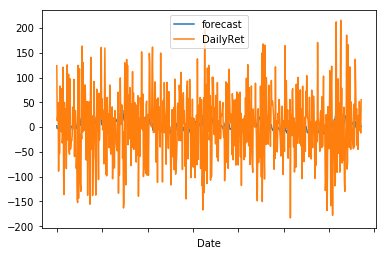

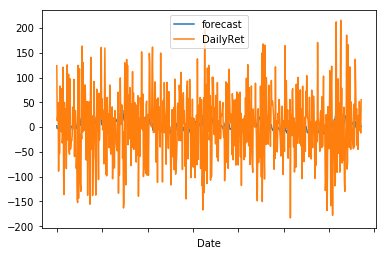

In [40]:
best_model['model'].plot_predict()